### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yasminanr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yasminanr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Dataset

In [2]:
data = pd.read_csv('twitter.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### Data Cleaning and Preprocessing

#### Convert to lowercase letters

In [7]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

#### Delete numbers

In [8]:
data['tweet'] = data['tweet'].str.replace('\d','')

#### Remove punctuation

In [9]:
data['tweet'] = data['tweet'].str.replace('[^\w\s]','')

#### Remove stopwords

In [10]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords.words('english')))

#### Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

#### Drop `id` column

In [13]:
data = data.drop('id', axis = 1)

#### Export clean data into a CSV file

In [14]:
# data.to_csv('data.csv', index=False)

#### Load clean dataset

In [15]:
df = pd.read_csv('data.csv')

In [16]:
df.head()

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time urð ðððð ððð
4,0,factsguide society motivation


#### Divide dataset into training and testing data

In [17]:
x = df['tweet']
y = df['label']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle=True, random_state = 42)

### Vectorize Data

In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train.values.astype('U'))

x_train_count = vectorizer.transform(x_train.values.astype('U'))
x_test_count = vectorizer.transform(x_test.values.astype('U'))

In [20]:
classifier = MultinomialNB()
classifier.fit(x_train_count, y_train)

MultinomialNB()

In [21]:
pred_train = classifier.predict(x_train_count)

In [22]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     23783
           1       0.88      0.71      0.79      1786

    accuracy                           0.97     25569
   macro avg       0.93      0.85      0.89     25569
weighted avg       0.97      0.97      0.97     25569



In [23]:
pred_test = classifier.predict(x_test_count)

In [24]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.89      0.46      0.60       456

    accuracy                           0.96      6393
   macro avg       0.92      0.73      0.79      6393
weighted avg       0.95      0.96      0.95      6393



In [25]:
pd.DataFrame(data=confusion_matrix(y_test, pred_test), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])

,P No,P Yes
A No,5911,26
A Yes,248,208


### TF-IDF

In [26]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(x_train.values.astype('U'))

x_train_tf_idf = tf_idf_vectorizer.transform(x_train.values.astype('U'))
x_test_tf_idf = tf_idf_vectorizer.transform(x_test.values.astype('U'))

x_train_tf_idf = x_train_tf_idf.toarray()
x_test_tf_idf = x_test_tf_idf.toarray()

In [27]:
classifier = GaussianNB()
classifier.fit(x_train_tf_idf, y_train)

GaussianNB()

In [28]:
pred_train = classifier.predict(x_train_tf_idf)

In [29]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23783
           1       0.55      1.00      0.71      1786

    accuracy                           0.94     25569
   macro avg       0.78      0.97      0.84     25569
weighted avg       0.97      0.94      0.95     25569



In [30]:
pred_test = classifier.predict(x_test_tf_idf)

In [31]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5937
           1       0.28      0.63      0.38       456

    accuracy                           0.86      6393
   macro avg       0.62      0.75      0.65      6393
weighted avg       0.92      0.86      0.88      6393



In [32]:
pd.DataFrame(data=confusion_matrix(y_test, pred_test), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])

,P No,P Yes
A No,5183,754
A Yes,168,288


In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

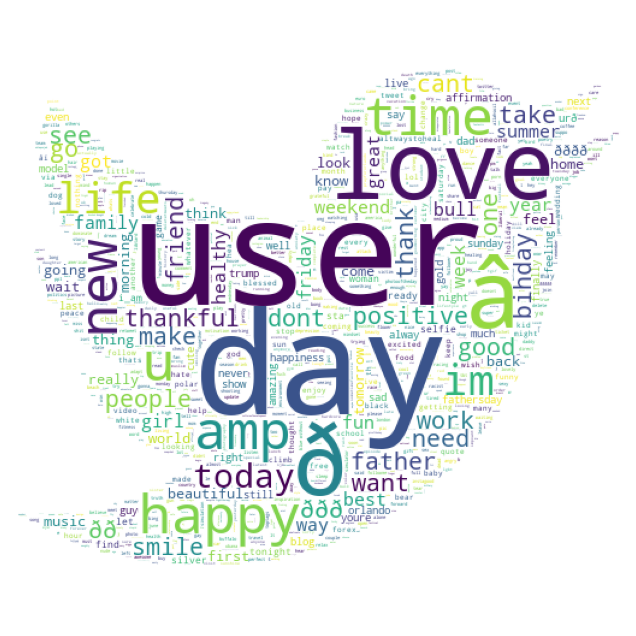

In [34]:
tw_mask = np.array(Image.open('twitter_mask3.jpg'))

text = ' '.join(i for i in data.tweet)

wc = WordCloud(background_color = 'white',
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = 'red',
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [8,8])
plt.imshow(wc)
plt.axis('off')
plt.show()